# ¡Hola Rodrigo! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Rodrigo buen trabajo completando este proyecto! Has demostrado habilidades destacables en análisis exploratorio y visualización efectiva de datos. Además, tu capacidad para formular y verificar hipótesis estadísticas fue sólida y precisa, mostrando un fuerte dominio en el análisis crítico necesario para la toma de decisiones estratégicas.

Algo que debes tener en cuenta es que en el contexto del análisis de datos, es importante reconocer que nuestro cerebro humano enfrenta limitaciones naturales al procesar y comparar valores numéricos de gran magnitud, lo cual puede dificultar la comprensión efectiva de la información cuantitativa; por esta razón, te sugiero siempre complementar tu análisis con gráficas, ya que esta herramienta transforma los datos numéricos abstractos en elementos visuales que nuestro sistema cognitivo puede interpretar de manera más natural e intuitiva, permitiéndonos realizar comparaciones directas y facilitando la identificación de patrones, tendencias y diferencias significativas con un simple vistazo, lo que resultaría considerablemente más desafiante si solo trabajáramos con los números en su forma bruta. Te comparto la siguiente página donde podrás aprender a seleccionar el mejor tipo de gráfico de acuerdo a la naturaleza de tus datos: [Data to Viz](https://www.data-to-viz.com/)

En general, desarrollaste un muy buen análisis en este caso de estudio, sigue manteniendo esta combinación de habilidades técnicas, analíticas y estratégicas en tus futuros proyectos.

¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

------

In [1]:
#Importar las librerias que vamos a necesitar
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
#Integrar la base de datos e imprimir la información del DF.
games=pd.read_csv('/datasets/games.csv')
games.info()
print()
print()
print(games.columns)
print()
print()
print('Valores vacios\n',games.isna().sum())
print()
print()
print('Valores duplicados',games.duplicated().sum())
print()
print()
print(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Valores vacios
 Name                  2
Platform             

Observaciones
1.Cambiar los nombres de las columnas a minusculas.
2.El año de lanzamiento debería ser INT ademas verificar media y mediana para rellenar datos.
3.La calificación de los usuarios y de los criticos debería de tener unidades similares, ambas van a ser de 0 a 100 y como dato INT, verificar media y mediana para ambas calificaciones y decidir como rellena los valores vacios.
4.ESRB rating es para limitar el uso de los juegos a edades especificas, al no tener esta rating todos pueden jugarlos, no afectaría rellenar estos valores con el rating E.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente la función `info`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

Tambien es muy acertado que hayas realizado una validación de datos duplicados y faltantes, esto permite tener claridad sobre la estrategía para el manejo de los datos

</div>

In [3]:
#Coregir los datos del DF.
games.columns=games.columns.str.lower()
print(games['year_of_release'].describe())

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


In [4]:
games['year_of_release'].fillna(2006,inplace=True)
games['year_of_release']=games['year_of_release'].astype('int')
print(games)
print()
print()
print(games['critic_score'].describe())


                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [5]:
#Encontrar una media en user_score
users_score=games['user_score'].dropna()
users_score = pd.to_numeric(users_score, errors='coerce').dropna()

print(users_score.describe())

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


In [6]:
#Rellenar ambas columnas de calificación, dejarlas como calificación de 0 a 100
#y convertirlas a enteros
games['critic_score'].fillna(70,inplace=True)
games['user_score']= pd.to_numeric(games['user_score'], errors='coerce')
games['user_score'].fillna(7.1,inplace=True)
games['user_score']=games['user_score'] * 10
games['critic_score']= games['critic_score'].astype('int')
games['user_score']=games['user_score'].astype('int')
#rellenar la columna Ratings
games['rating'].fillna('E',inplace=True)
#Generar la columna ventas totales
games['total_sales']= games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
#Llenar la columna genre
games['genre'].fillna('Misc',inplace=True)
#Llenar la columna name
games['name'].fillna('Unknown',inplace=True)
print(games)
games.info()

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo ajustando los datos, esto garantizará que el análisis de la información sea más fácil de implementar

Con respecto al manejo de datos faltantes, las estrategias que planteas son válidas para el contexto del caso de estudio; no obstante, acá te comparto un artículo donde hablan sobre diferentes [métodos de manejo de datos faltanes](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python) que seguro te serán útiles en futuros proyectos.

</div>

In [7]:
#juegos lanzados por año
print('Cantidad de juegos por año\n',games.groupby(games['year_of_release'])['name'].count())

Cantidad de juegos por año
 year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1275
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


In [8]:
print(games.groupby(games['platform'])['total_sales'].sum())

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64


In [9]:
sales_per_platform=games.groupby(games['platform'])['total_sales'].sum().sort_values(ascending=False).reset_index(name='sales')
print('Ventas totales por plataforma\n',sales_per_platform)

Ventas totales por plataforma
    platform    sales
0       PS2  1255.77
1      X360   971.42
2       PS3   939.65
3       Wii   907.51
4        DS   806.12
5        PS   730.86
6       GBA   317.85
7       PS4   314.14
8       PSP   294.05
9        PC   259.52
10      3DS   259.00
11       XB   257.74
12       GB   255.46
13      NES   251.05
14      N64   218.68
15     SNES   200.04
16       GC   198.93
17     XOne   159.32
18     2600    96.98
19     WiiU    82.19
20      PSV    54.07
21      SAT    33.59
22      GEN    30.77
23       DC    15.95
24      SCD     1.86
25       NG     1.44
26       WS     1.42
27     TG16     0.16
28      3DO     0.10
29       GG     0.04
30     PCFX     0.03


In [10]:
top_platforms=sales_per_platform[sales_per_platform['sales']>258]['platform'].tolist()
print(top_platforms)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC', '3DS']


In [11]:
top_platform_games=games.query('platform in @top_platforms')
print(top_platform_games)

                                                   name platform  \
0                                            Wii Sports      Wii   
2                                        Mario Kart Wii      Wii   
3                                     Wii Sports Resort      Wii   
6                                 New Super Mario Bros.       DS   
7                                              Wii Play      Wii   
...                                                 ...      ...   
16708                Woody Woodpecker in Crazy Castle 5      GBA   
16709  SCORE International Baja 1000: The Official Game      PS2   
16710                     Samurai Warriors: Sanada Maru      PS3   
16711                                  LMA Manager 2007     X360   
16713                                  Spirits & Spells      GBA   

       year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  \
0                 2006    Sports     41.36     28.96      3.77         8.45   
2                 2008   

In [12]:
sales_year_platform=top_platform_games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index(name='sales_year')
print(sales_year_platform)

    platform  year_of_release  sales_year
0        3DS             2006        1.19
1        3DS             2011       63.20
2        3DS             2012       51.36
3        3DS             2013       56.57
4        3DS             2014       43.76
..       ...              ...         ...
120     X360             2012       99.74
121     X360             2013       88.58
122     X360             2014       34.74
123     X360             2015       11.96
124     X360             2016        1.52

[125 rows x 3 columns]


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Los valores son correctos. Sin embargo, recuerda que los seres humanos somos principalmente visuales. Por lo tanto, cuando manejes este tipo de información, una buena práctica es acompañarla de una gráfica. Esto facilita el estudio y el análisis de los datos.

</div>

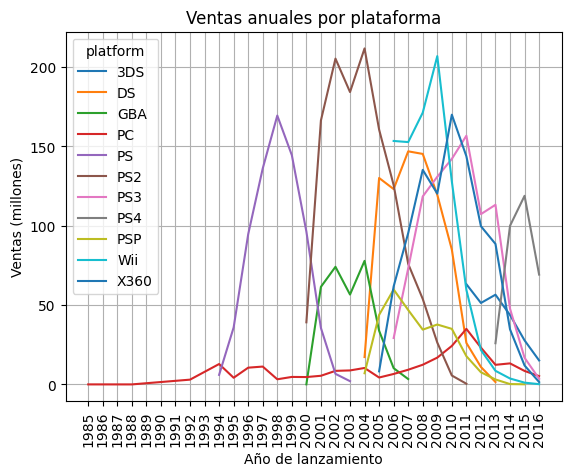

In [13]:
pivot_sales = sales_year_platform.pivot(index='year_of_release', columns='platform', values='sales_year')
pivot_sales.plot(title='Ventas anuales por plataforma',
                 xlabel='Año de lanzamiento',
                 ylabel='Ventas (millones)',
                 rot=90,
                 grid=True
                )
plt.xticks(ticks=range(1985, 2017, 1))
plt.show()

El problema es que las ventas son acumuludas y no tenemos claro las ventas por año, un juego que se lanzó en 2012 va a tener mas ventas en 2016 que un juego que se lanzó ese mismo año, este problema limita mucho los estudios que podemos realizar.
Observando la gráfica anterior podemos concluir que una consola está en el mercado un promedio de 9.5 años. Usando esta información se decidió que el perioso usado sea 2011 -2015, ya que 2016 todos los valores caen pues son juegos que no llevan mucho tiempo en el mercado van a afectar nuestro estudio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

El gráfico confirma que cada generación de consolas tiene un ciclo de vida (aproximadamente 5 años) con un período de auge y una posterior caída, lo que sugiere que el éxito de un videojuego está fuertemente vinculado al momento en el que es lanzado dentro de ese ciclo. 

</div>

In [14]:
games_last_years=games[(games['year_of_release']>=2011)&(games['year_of_release']<=2015)].reset_index()
print(games_last_years)

      index                               name platform  year_of_release  \
0        16                 Grand Theft Auto V      PS3             2013   
1        23                 Grand Theft Auto V     X360             2013   
2        29     Call of Duty: Modern Warfare 3     X360             2011   
3        31          Call of Duty: Black Ops 3      PS4             2015   
4        33                Pokemon X/Pokemon Y      3DS             2013   
...     ...                                ...      ...              ...   
3515  16688      Outdoors Unleashed: Africa 3D      3DS             2011   
3516  16692  Metal Gear Solid V: Ground Zeroes       PC             2014   
3517  16696                             Breach       PC             2011   
3518  16702            STORM: Frontline Nation       PC             2011   
3519  16707                   Aiyoku no Eustia      PSV             2014   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0       

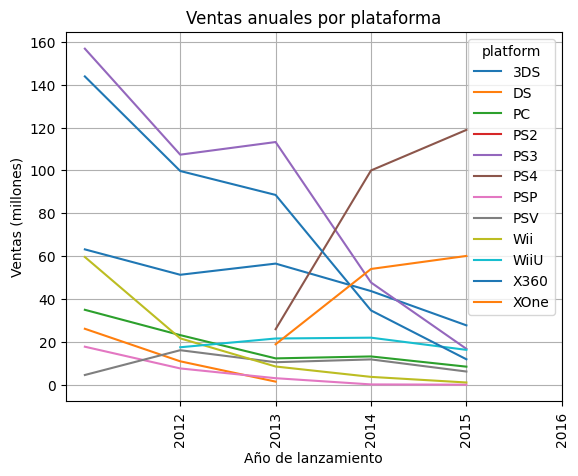

In [15]:
last_years_platform_sales=games_last_years.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index(name='sales_year')
pivot_sales_last_years = last_years_platform_sales.pivot(index='year_of_release', columns='platform', values='sales_year')
pivot_sales_last_years.plot(title='Ventas anuales por plataforma',
                 xlabel='Año de lanzamiento',
                 ylabel='Ventas (millones)',
                 rot=90,
                 grid=True
                )
plt.xticks(ticks=range(2012, 2017, 1))
plt.show()



X-BOX One y PlayStation 4 son las consolas que tienen un crecimiento en los ultimos años. PC es la unica consolo que ha durado mas de 11 años y aunque sus valores de venta son bajos no pueden ser ignorados por su contstancia.

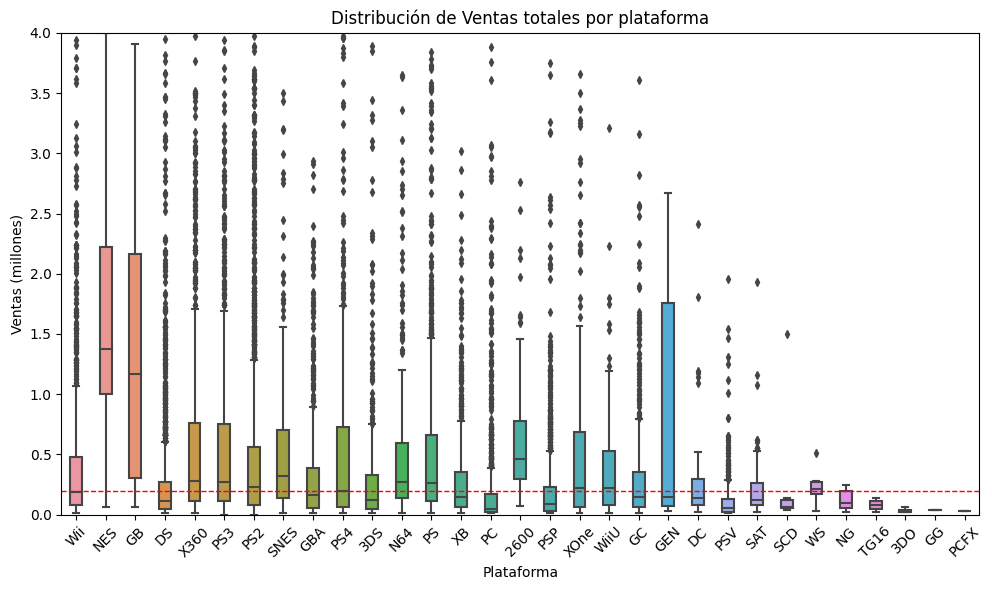

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='platform',
    y='total_sales',
    data=games,
    width=0.4,
    linewidth=1.5,
    fliersize=4,
)
plt.title('Distribución de Ventas totales por plataforma')
plt.xticks(rotation=45)
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.ylim(0, 4)
plt.axhline(y=0.2, color='red', linestyle='--', linewidth=1, label='300,000 ventas')
plt.show()

La gráfica de cajas nos dejó observar que la mayoria de plataformas está alrededor de 250,000 ventas en promedio. E

Para la correlación entre reseñas y ventas vamos a usar la plataforma de PS3 porque ya cumplió su ciclo y lo hizo en una epoca mas moderna donde las reseñas pueden tener mas impacto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo obteniendo los *box-plot*. Estos muestran que la mayoría de los juegos tienen ventas bajas, hay valores extremos que dominan en cada plataforma. Esto muestra que el éxito de un juego no depende solo de la consola, sino también de su popularidad y estrategia de marketing.

</div>

In [17]:
def critic_score_sales_corr(platform,df=games):
    filtered_table=df[df['platform']==platform].reset_index()
    sales_critic_corr=filtered_table['total_sales'].corr(filtered_table['critic_score'])
    return sales_critic_corr

critic_score_sales_corr('PS4')

0.3442009137166681

In [18]:
for platform in top_platforms:
    print(f'{platform} tiene una correlación de',critic_score_sales_corr(platform),'entre sus ventas y las reseñas de los críticos.\n')

PS2 tiene una correlación de 0.3566842976853848 entre sus ventas y las reseñas de los críticos.

X360 tiene una correlación de 0.3680036970124464 entre sus ventas y las reseñas de los críticos.

PS3 tiene una correlación de 0.4082271583491732 entre sus ventas y las reseñas de los críticos.

Wii tiene una correlación de 0.11508514200890671 entre sus ventas y las reseñas de los críticos.

DS tiene una correlación de 0.1316950610239694 entre sus ventas y las reseñas de los críticos.

PS tiene una correlación de 0.34436206752452286 entre sus ventas y las reseñas de los críticos.

GBA tiene una correlación de 0.13078540607089284 entre sus ventas y las reseñas de los críticos.

PS4 tiene una correlación de 0.3442009137166681 entre sus ventas y las reseñas de los críticos.

PSP tiene una correlación de 0.2135958121933219 entre sus ventas y las reseñas de los críticos.

PC tiene una correlación de 0.21909789666826074 entre sus ventas y las reseñas de los críticos.

3DS tiene una correlación de

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Con esta información se evidencia que la puntuación de los críticos está un poco más relacionada con las ventas que la de los usuarios, aunque la correlación es débil. En User_Score no hay una tendencia clara, pero en Critic_Score, los juegos mejor calificados tienden a vender más. Esto sugiere que las críticas especializadas pueden tener mayor impacto en las ventas.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para este tipo de datos es recomendable usar un *scatter-plot* con el fin de poder identificar las correaciones de una manera visual.

</div>
</div>

Después de revisar la correlación de 10 plataformas, podemos conlcuir que no hay una relación entre las ventas y la reseña de los críticos.

           genre  genre_sales
0         Action      1744.17
1      Adventure       237.59
2       Fighting       447.53
3           Misc       804.93
4       Platform       827.77
5         Puzzle       242.57
6         Racing       728.67
7   Role-Playing       934.56
8        Shooter      1052.45
9     Simulation       389.97
10        Sports      1331.27
11      Strategy       174.23


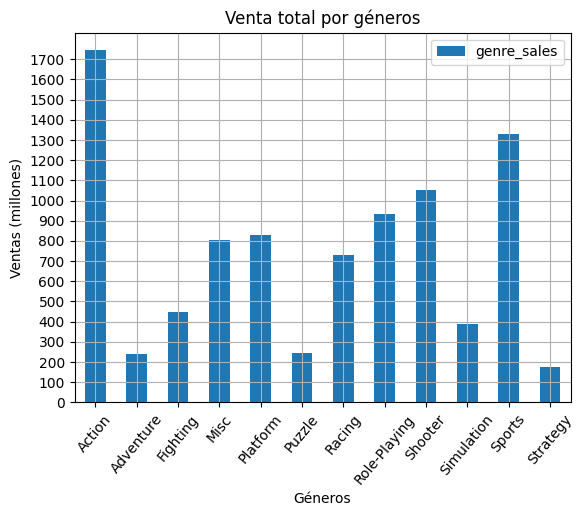

In [19]:
genre_sales=games.groupby('genre')['total_sales'].sum().reset_index(name='genre_sales')
genre_sales.plot(x='genre',
                 y='genre_sales',
                 kind='bar',
                 xlabel='Géneros',
                 ylabel='Ventas (millones)',
                 rot=50,
                 title='Venta total por géneros',
                grid=True)
plt.yticks(ticks=range(0,1800,100))           
print(genre_sales)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo! Se ve claramente que los juegos de acción y disparo lideran en ventas. Los géneros de rol y deportes también destacan, aunque en menor medida. En cambio, los de estrategia, aventura y puzzle muestran ventas más bajas, lo que indica una demanda más limitada.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para los diagramas de barras es mejor que organices las barras por tamaño y no por orden alfabetico, con el fin de poder hacer una análisis mucho más directo.

</div>
</div>

Acción y aventura son los generos con mas ventas.
Aventura, rompecabezas y estrategia son lo que menos se venden.

Perfil de géneros para la región NA:
        genre   sales
0     Action  879.01
10    Sports  684.43
8    Shooter  592.24
4   Platform  445.50
3       Misc  409.05
Perfil de plataformas para la región NA:
    platform   sales
28     X360  602.47
16      PS2  583.84
26      Wii  496.90
17      PS3  393.49
4        DS  382.40
Perfil de géneros para la región JP:
            genre   sales
7   Role-Playing  355.41
0         Action  161.43
10        Sports  135.54
4       Platform  130.83
3           Misc  108.14
Perfil de plataformas para la región JP:
    platform   sales
4        DS  175.57
15       PS  139.82
16      PS2  139.20
23     SNES  116.55
2       3DS  100.67
Perfil de géneros para la región EU:
       genre   sales
0    Action  519.13
10   Sports  376.79
8   Shooter  317.34
6    Racing  236.51
3      Misc  213.27
Perfil de plataformas para la región EU:
    platform   sales
16      PS2  339.29
17      PS3  330.29
28     X360  270.76
26      Wii  262.21
15       PS  213.61


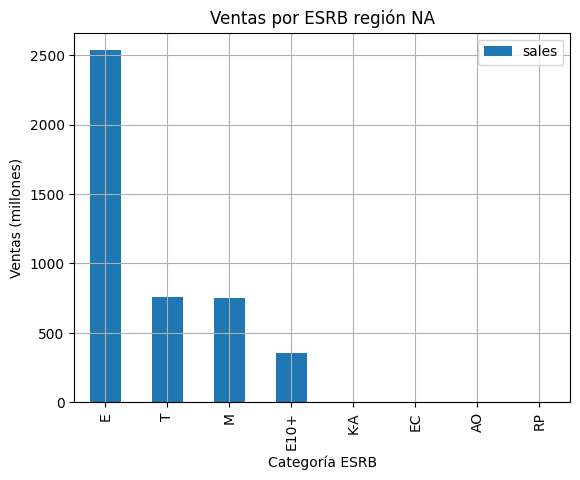

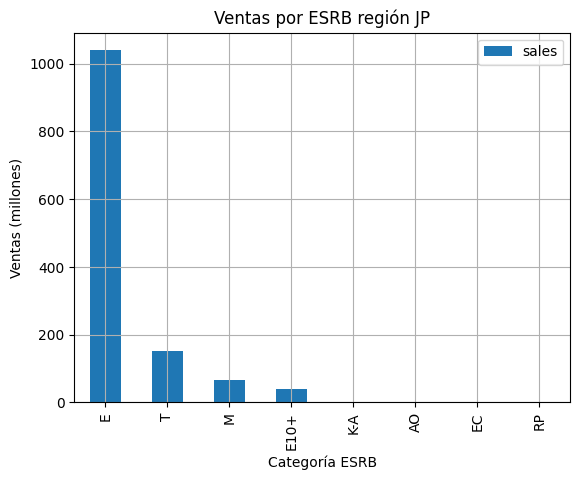

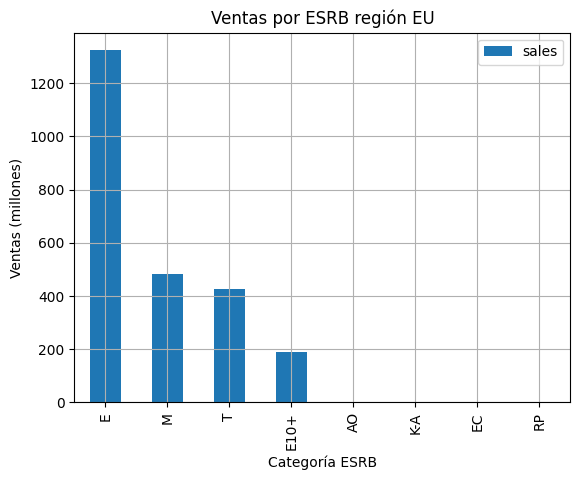

In [20]:
def region_profile(region,df=games):
    region_platform=df.groupby('platform')[region].sum().reset_index(name='sales').sort_values(by='sales',ascending=False).head(5)
    
    region_genre=df.groupby('genre')[region].sum().reset_index(name='sales').sort_values(by='sales',ascending=False).head(5)
    
    rating_sales=df.groupby('rating')[region].sum().reset_index(name='sales').sort_values(by='sales',ascending=False)
    rating_sales.plot(title=f'Ventas por ESRB región {region[0:2].upper()}',
                      x='rating',
                      y='sales',
                      xlabel='Categoría ESRB',
                      ylabel='Ventas (millones)',
                      kind='bar',
                      grid=True)
    print(f'Perfil de géneros para la región {region[0:2].upper()}:\n', region_genre)
    print(f'Perfil de plataformas para la región {region[0:2].upper()}:\n', region_platform)
    return
regions=['na_sales','jp_sales','eu_sales']
for region in regions:
    region_profile(region)

En la región NA se venden mas juegos en comparación con las regiones JP y EU. En la región JP los juegos mas populares son los RPG mientras que en NA y EU son los de acción. Para las tres regiones se venden muchos mas juegos con clasificación ESRB 'E', hace sentido ya que hay mas jugadores disponibles para estos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Rodrigo has logrado identificar claramente las diferencias entre América del Norte, Europa y Japón, no solo en términos de plataformas y géneros predominantes, sino también en la influencia de las clasificaciones ESRB, lo que refleja tu capacidad para conectar datos con tendencias culturales y de comportamiento. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para lograr un análisis comparativo más efectivo, sería beneficioso presentar cada sección de información empleando un único diagrama de barras. Al asignar un color distintivo a cada región, podremos crear una representación visual unificada que facilite la identificación de patrones y diferencias entre las distintas áreas. Esta consolidación de datos no solo optimizará el espacio visual, sino que también permitirá al lector establecer conexiones y comparaciones de manera más intuitiva y directa entre los distintos conjuntos de información. Acá te muestro un ejemplo 

<img src="https://www.analyticslane.com/storage/2022/06/matplotlib-barras-adyacentes.png.webp" width="400">

</div>
</div>

In [21]:
xone_rates=games[games['platform']=='XOne']['critic_score']
pc_rates=games[games['platform']=='PC']['critic_score']
alpha=0.05
results=st.ttest_ind(xone_rates,pc_rates,equal_var=True)
print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.003996111581816079
Rechazamos la hipótesis nula


In [22]:
action_score=games[games['genre']=='Action']['critic_score']
sports_score=games[games['genre']=='Sports']['critic_score']
alpha=0.05
results=st.ttest_ind(action_score,sports_score,equal_var=False)
print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 2.505647134807503e-25
Rechazamos la hipótesis nula


En ambos casos se prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales.

Se definió alpha como 5% porque la jugabilidad y graficos pueden cambiar de una plataforma a otra, de este modo el rango para aceptar la H0 era un poco mayor.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Rodrigo aplicaste correctamente las prueba de hipótesis comparando las distribuciones dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto servirá para tener una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

CONCLUSIÓN GENERAL

Al no tener las ventas seccionadas por años se tiene un sesgo extra al momento de analizar los datos pues un juego que salió hace 2 años comparado con un juego que salió hace un año es mas factible presentar mas ventas pues ha estado mas tiempo en el mercado y las ventas son acumulativas. 

Lo que si podemos conlcuir es que NA es la región donde hay mas ventas de juegos y acción es el juego que se vende mas.

En 2017 deberíamos esperar que el PS4 y el X-BOX One aumenten sus ventas, no hay que perder de vista los juegos de PC pues es la unica consola que se mantiene constante por casi mas de 15 años.

En conclusión si quieres tener un juego best-seller en 2017 tendría que ser para PS4 o X-BOX One y de acción.
